### Data science Regression project: Predicting Home Prices in Baglore


In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
warnings.filterwarnings("ignore")

In [23]:
data=pd.read_csv("bengaluru_house_prices.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Basics checks of EDA

In [27]:
data.shape

(13320, 9)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [31]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [35]:
!pip install missingno

In [37]:
import missingno as mnso

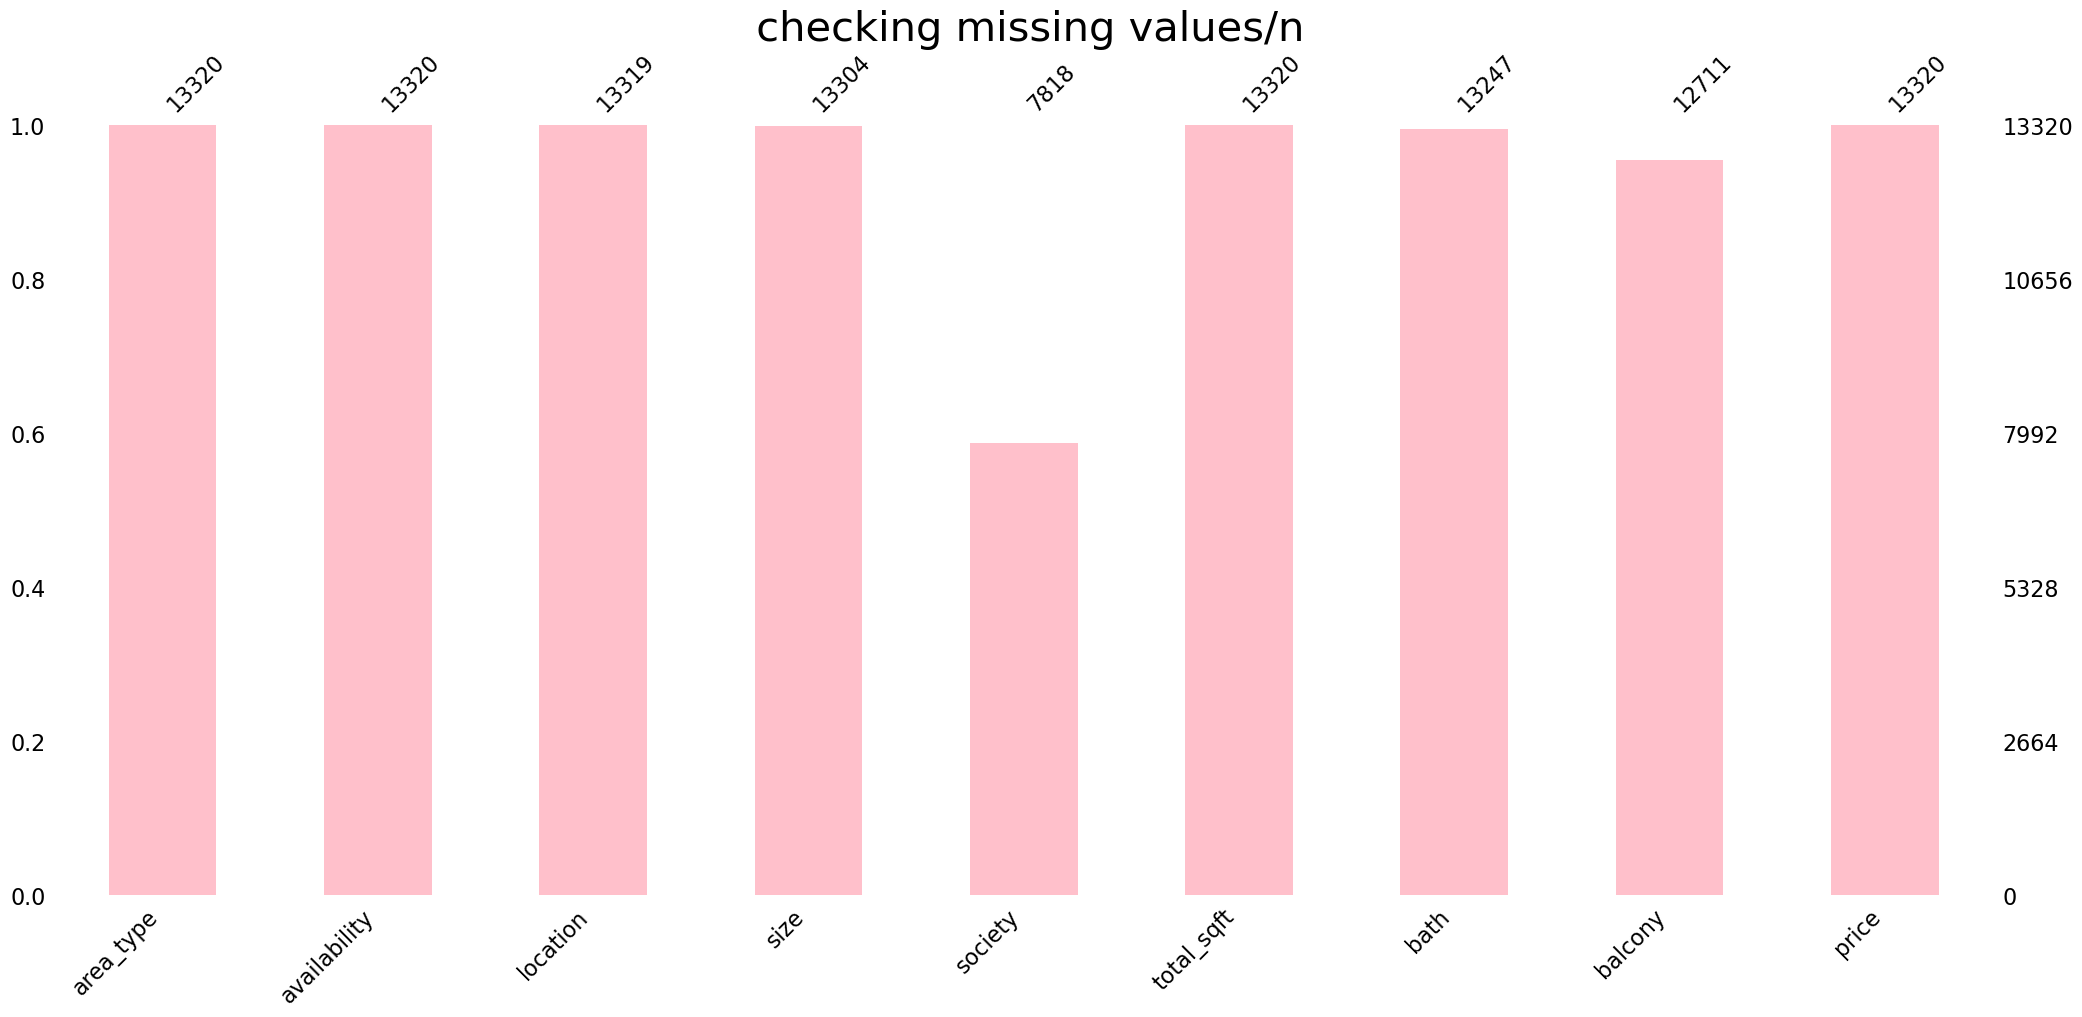

In [43]:
mnso.bar(data,color="pink")
plt.title(" checking missing values/n",fontsize=30)
plt.show()

In [47]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [49]:
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [53]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [57]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

## explore data analysis
. bivariate analysis
. univariate analysis

In [68]:
!pip install sweetviz

In [70]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [72]:
num_colum = data.select_dtypes(exclude= "object")
cat_colum = data.select_dtypes(include = 'object')

NameError: name 'num_column' is not defined

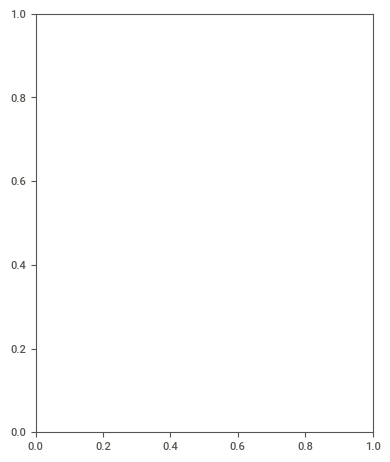

In [92]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber =1
for column in num_colum:
     if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=num_column[column],hue=data['house predicton'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('house predict status',fontsize=20)
     plotnumber+=1   
plt.tight_layout()

## Drop Features That are not required to build our model

In [61]:
data1=data.drop(['area_type','society','balcony','availability'],axis='columns')
data1.shape

(13320, 5)

## Data cleaning

In [64]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [94]:
data1.shape

(13320, 5)

In [98]:
data2 =data1.dropna()
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Feature Engineering
. adding new features (integer )for bhk (Bedroom HallKitchen)

In [105]:
data2['bhk']=data2["size"].apply(lambda x: int(x.split(' ')[0]))

## EXPLORE TOTAL_SQRT Features

In [109]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
          
 

In [115]:
data2[~data2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
#Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple



In [122]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [124]:
df4 = data2.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [129]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [131]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats


count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [133]:
df5.to_csv("bhp.csv",index=False)


##Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locationstats


In [136]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [138]:
len(df5.location.unique())

1287

In [148]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats else x)
len(df5.location.unique())

1

In [150]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,other,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000


## outlier removal

In [153]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,other,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [155]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [157]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(11294, 7)

In [159]:
###Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like



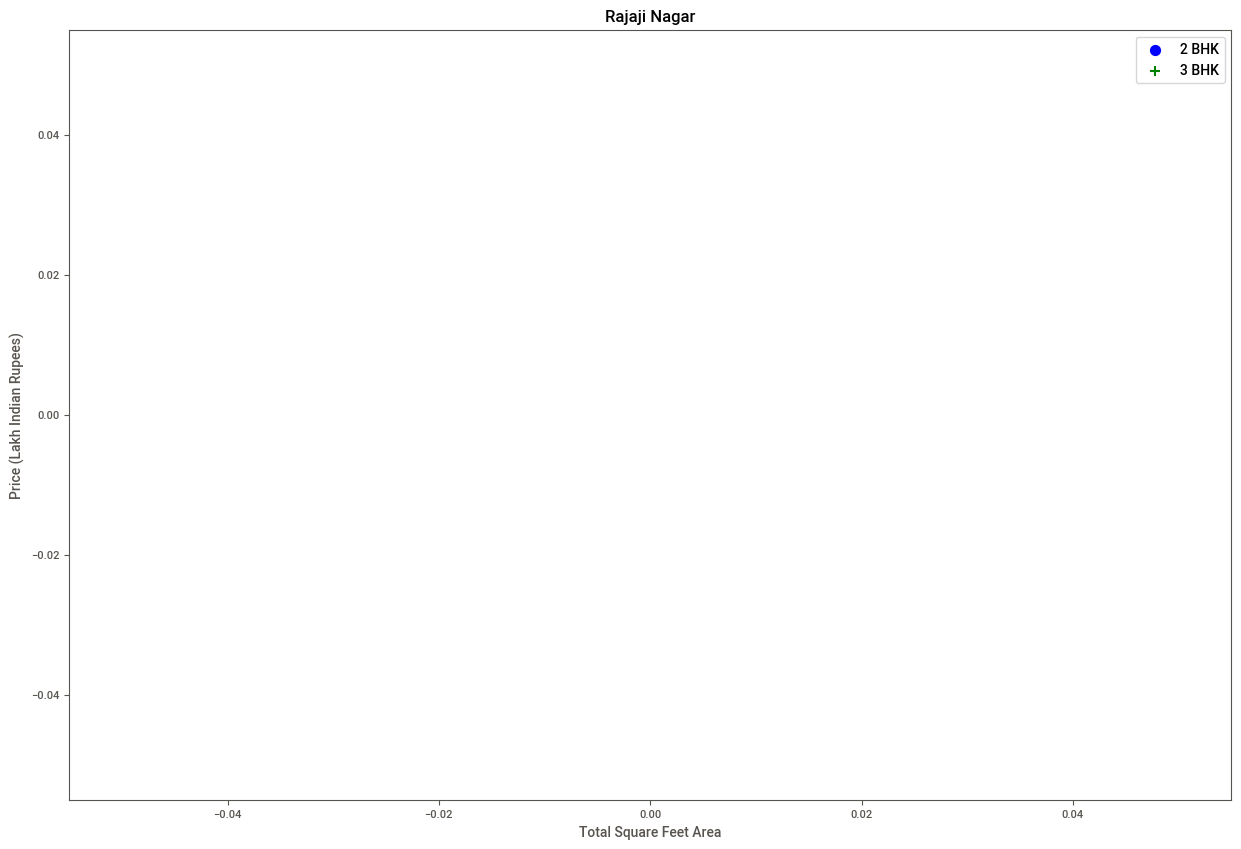

In [177]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")


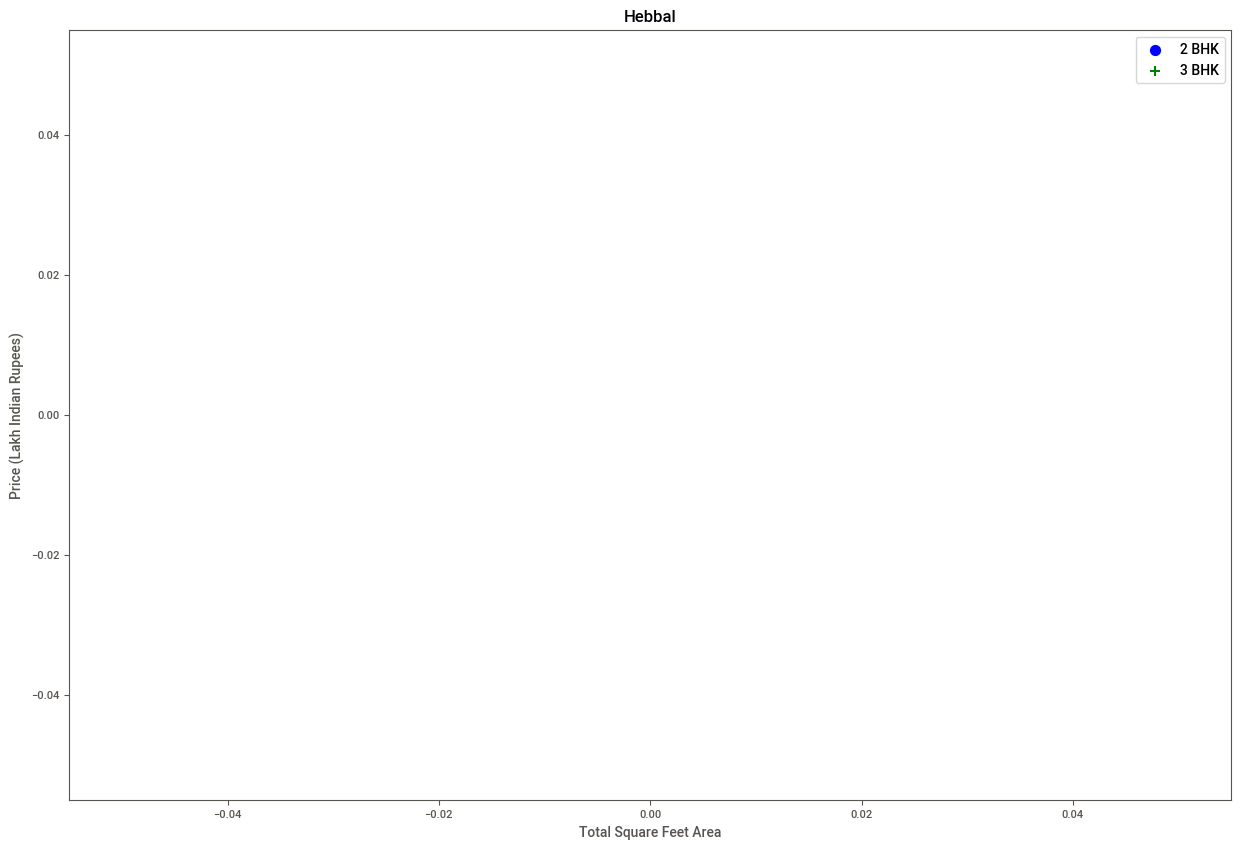

In [179]:
plot_scatter_chart(df7,"Hebbal")

In [181]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(5959, 7)

In [183]:
df8.bath.unique()

array([ 3.,  4.,  2.,  1.,  5.,  7.,  8.,  6.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

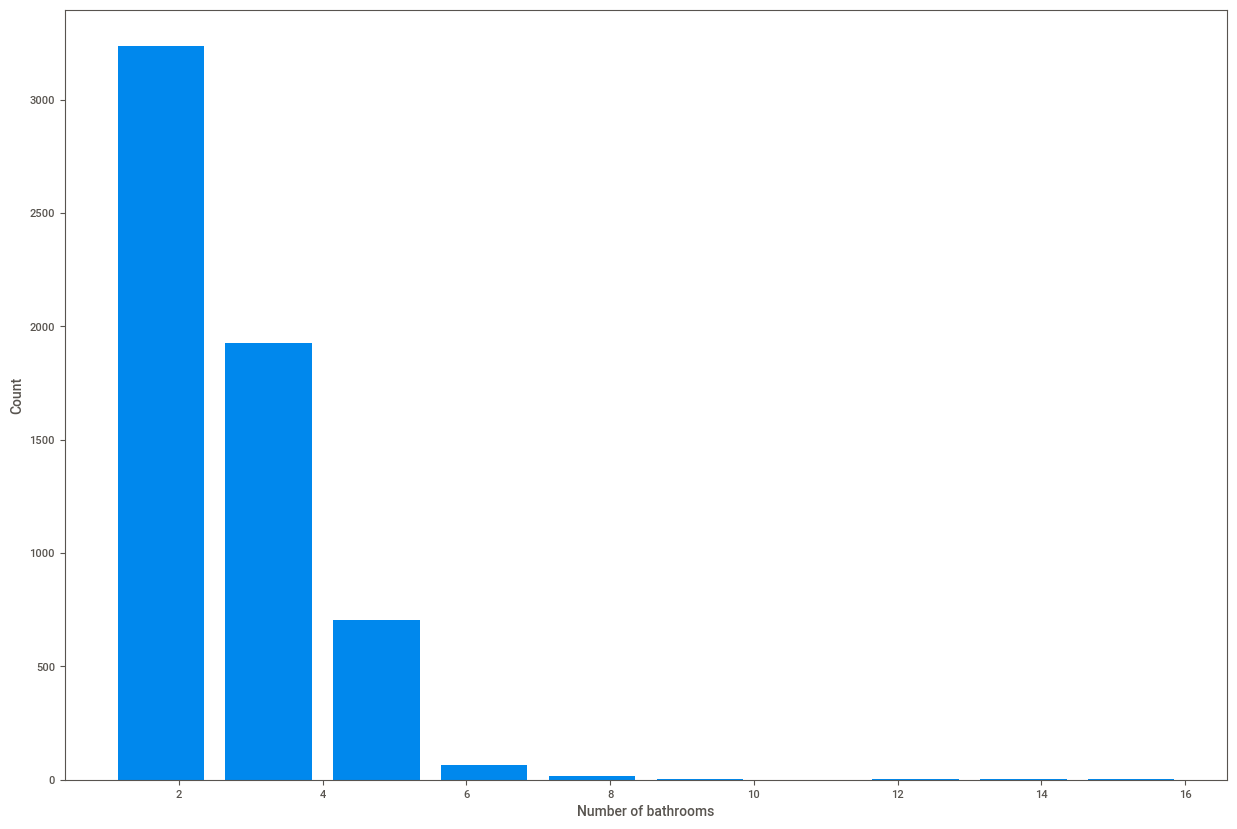

In [185]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [187]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2643,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3073,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6756,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8409,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [189]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2241,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9626,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
10260,other,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [191]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(5886, 7)

In [193]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
3,other,1521.0,3.0,95.0,3
6,other,2732.0,4.0,204.0,4
11,other,2250.0,3.0,148.0,3


In [195]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,other
3,True
6,True
11,True


In [197]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk
3,other,1521.0,3.0,95.0,3
6,other,2732.0,4.0,204.0,4
11,other,2250.0,3.0,148.0,3
12,other,1175.0,2.0,73.5,2
15,other,2770.0,4.0,290.0,3


In [199]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk
3,1521.0,3.0,95.0,3
6,2732.0,4.0,204.0,4


### Build a Model Now

In [202]:
df12.shape

(5886, 4)

In [204]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk
3,1521.0,3.0,3
6,2732.0,4.0,4
11,2250.0,3.0,3


In [206]:
y = df12.price
y.head(3)

3      95.0
6     204.0
11    148.0
Name: price, dtype: float64

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [210]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8749712560171141

##Use K Fold cross validation to measure accuracy of our LinearRegression model

In [213]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.85505315, 0.88127975, 0.88839668, 0.90827705, 0.87071589])

In [217]:
print(X.dtypes)
print(y.dtype)


total_sqft    float64
bath          float64
bhk             int64
dtype: object
float64


In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
model = RandomForestClassifier()
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)


In [223]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [225]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [229]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [231]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))